### Attempt 2

Attempt 1 erroneously tagged the y-range to be between 0 -5 instead of 1 - 5. The new approach tries to change that to determine if it provides a different perspective in PCA analysis

In [1]:
!pwd
from fastai import *
from fastai.collab import *

/home/ec2-user/SageMaker/collab_filter_rating_prediction_01/train


In [2]:
ROOT_PATH = Path('/home/ec2-user/SageMaker/collab_filter_rating_prediction_01')
DATA_PATH = ROOT_PATH/'data'
SAVE_PATH = ROOT_PATH/'saved_model'

In [3]:
reviews_with_category_file = DATA_PATH/'reviews_with_category_ecsk.csv'


In [4]:
df = pd.read_csv(reviews_with_category_file)

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,product_id,product,brand,id,user_nickname,rating,review_text,avataar_url,...,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,age,eyeColor,hairConcerns,product_category_primary,product_category_secondary
0,0,1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,9e4619a8-e16d-4a7e-8147-24648db5b06e,charlie201,5,This is another excellent product that complim...,NaN,...,NaN,NaN,NaN,yes,NaN,35to44,NaN,NaN,Men,Shaving
1,1,2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,c839ee43-074b-48e6-98a9-1d2350192ec9,sz123,1,This starts out smelling like a delieghtfully ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
2,2,3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,fcd90538-4465-4ca3-8c27-734b4d81c6c8,dolceragazza,5,I have received lots of compliments when I wea...,NaN,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN
3,3,4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,4478b6f8-27a4-4585-a829-e7e3bb226f50,MouseRat,5,I grabbed this deluxe sample for my boyfriend ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
4,4,5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,a72059c5-0aad-4f87-a489-38f7f02a30ea,MaggieV18,5,I got a sample for my fiance and he loved it s...,NaN,...,NaN,NaN,NaN,yes,NaN,18to24,NaN,NaN,Men,NaN


In [6]:
df['product_id_name'] = df['product_id'] + "_" + df['product'] + "_" + df['brand']

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,product_id,product,brand,id,user_nickname,rating,review_text,avataar_url,...,hairCondition,hairColor,beautyInsider,skinTone,age,eyeColor,hairConcerns,product_category_primary,product_category_secondary,product_id_name
0,0,1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,9e4619a8-e16d-4a7e-8147-24648db5b06e,charlie201,5,This is another excellent product that complim...,NaN,...,NaN,NaN,yes,NaN,35to44,NaN,NaN,Men,Shaving,94d1384c-1b58-402f-96a8-30d82fb1a106_Pre-Shave...
1,1,2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,c839ee43-074b-48e6-98a9-1d2350192ec9,sz123,1,This starts out smelling like a delieghtfully ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,3858badd-8a32-4775-996b-8f08197dffaf_Orange Sa...
2,2,3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,fcd90538-4465-4ca3-8c27-734b4d81c6c8,dolceragazza,5,I have received lots of compliments when I wea...,NaN,...,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a_Balenciag...
3,3,4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,4478b6f8-27a4-4585-a829-e7e3bb226f50,MouseRat,5,I grabbed this deluxe sample for my boyfriend ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...
4,4,5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,a72059c5-0aad-4f87-a489-38f7f02a30ea,MaggieV18,5,I got a sample for my fiance and he loved it s...,NaN,...,NaN,NaN,yes,NaN,18to24,NaN,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...


In [8]:
rdf = df.copy()

In [9]:
rdf = rdf[['user_nickname', 'product_id_name', 'rating']]

In [10]:
rdf[rdf['rating'].isna()].count()

user_nickname      0
product_id_name    0
rating             0
dtype: int64

In [53]:
rdf.head()


,user_nickname,product_id_name,rating
0,charlie201,94d1384c-1b58-402f-96a8-30d82fb1a106_Pre-Shave...,5
1,sz123,3858badd-8a32-4775-996b-8f08197dffaf_Orange Sa...,1
2,dolceragazza,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a_Balenciag...,5
3,MouseRat,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...,5
4,MaggieV18,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...,5


In [54]:
rdf.groupby('user_nickname')['rating'].count().nlargest(50)

user_nickname
dreamyone           135
tenngal              66
Mochapj              48
jonieku              45
bakeamuffin          37
twingrandma          35
veronika23           35
boww                 34
Tamara76             32
DressageQueen86      31
Stefanie0023         29
LovetoLoveLife       28
lucas538             27
nyaxa                27
jeankn               26
sbsunshine           26
LolaDiva             25
stellasmommy04       25
Catwomanca           24
Kim888               24
gigjig               24
kittycatgirlmeow     24
JennRen44            23
sydtomato            23
tryingtosoothe       23
Margalee             22
dancingdream99       22
nasnousa             22
tinazhang718         22
Wolfgirl22           21
artemisgem           21
baerro               21
gonerogue            21
greeneyedgirl107     21
Honeyandtea2012      20
MamaBare27           20
darlyndar            20
yaide                20
BrittanyRenee30      19
MidnightDreamer      19
halojones            19
it

### Find the range of y

In [11]:
rdf['rating'].unique()

array([5, 1, 4, 3, 2])

In [17]:
rdf.groupby('rating')['user_nickname'].count()/rdf['rating'].count() * 100

rating
1     9.598715
2     6.037031
3     7.073635
4    14.709978
5    62.580641
Name: user_nickname, dtype: float64

In [15]:
rdf['rating'].count()

140748

In [20]:
rdf.head()

,user_nickname,product_id_name,rating
0,charlie201,94d1384c-1b58-402f-96a8-30d82fb1a106_Pre-Shave...,5
1,sz123,3858badd-8a32-4775-996b-8f08197dffaf_Orange Sa...,1
2,dolceragazza,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a_Balenciag...,5
3,MouseRat,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...,5
4,MaggieV18,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...,5


In [21]:
data = CollabDataBunch.from_df(rdf, seed=42, valid_pct=0.2, item_name='product_id_name')

In [22]:
y_range = [1., 5.1]

In [23]:
learn = None
learn = collab_learner(data, n_factors=500, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


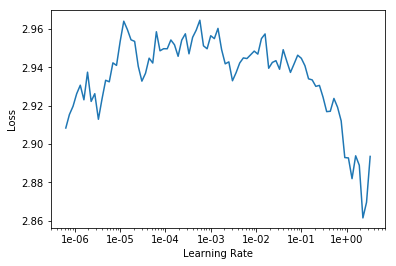

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, 6e-01)

epoch,train_loss,valid_loss,time
0,2.502780,2.467137,01:08
1,2.067039,2.022982,01:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 6.31E-08


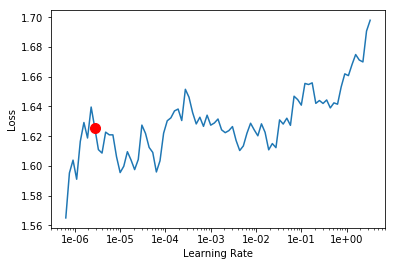

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [28]:
learn.fit_one_cycle(2, 5e-06)

epoch,train_loss,valid_loss,time
0,1.606799,2.022696,01:08
1,1.620280,2.022576,01:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


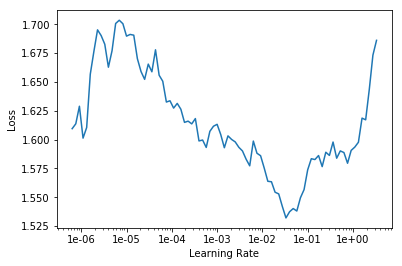

In [33]:
learn.lr_find()
learn.recorder.plot()


In [34]:
save_path = SAVE_PATH/'attempt_2_stage_1'
learn.save(save_path)

In [35]:
learn.fit_one_cycle(2, 1e-02)

epoch,train_loss,valid_loss,time
0,1.520700,1.958668,01:08
1,0.772312,1.988304,01:08


In [36]:
save_path = SAVE_PATH/'attempt_2_stage_2'
learn.save(save_path)

In [53]:
learn.load(save_path)

CollabLearner(data=TabularDataBunch;

Train: LabelList (112599 items)
x: CollabList
user_nickname sz123; product_id_name 3858badd-8a32-4775-996b-8f08197dffaf_Orange Sanguine Cologne Absolue Pure Perfume_Atelier Cologne; ,user_nickname dolceragazza; product_id_name f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a_Balenciaga Paris_BALENCIAGA; ,user_nickname MouseRat; product_id_name 1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic Facial Cleanser_Anthony; ,user_nickname MaggieV18; product_id_name 1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic Facial Cleanser_Anthony; ,user_nickname dafauk; product_id_name 1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic Facial Cleanser_Anthony; 
y: FloatList
1.0,5.0,5.0,5.0,4.0
Path: .;

Valid: LabelList (28149 items)
x: CollabList
user_nickname #na#; product_id_name c5b270c4-a41a-4248-b955-d83cd17dc3ae_Solstice Eyeshadow Palette_Aether Beauty; ,user_nickname #na#; product_id_name 244818b6-3270-47df-8cf8-1632dbb83b6b_One Condition&#xAE; Decadence Ultra Moisturizing Milk Co

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06
Min loss divided by 10: 7.59E-08


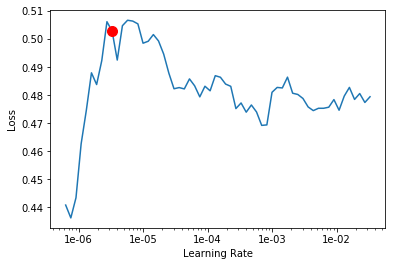

In [54]:
learn.lr_find()
learn.recorder.plot(suggestion=True, skip_end=30)


In [55]:
learn.fit_one_cycle(1, 4e-06)

epoch,train_loss,valid_loss,time
0,0.445396,1.988352,01:08


In [56]:
saved_model_file = SAVE_PATH/'attempt_2_stage_3'

In [57]:
learn.save(saved_model_file)

In [120]:
learn.load(saved_model_file)


CollabLearner(data=TabularDataBunch;

Train: LabelList (112599 items)
x: CollabList
user_nickname sz123; product_id_name 3858badd-8a32-4775-996b-8f08197dffaf_Orange Sanguine Cologne Absolue Pure Perfume_Atelier Cologne; ,user_nickname dolceragazza; product_id_name f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a_Balenciaga Paris_BALENCIAGA; ,user_nickname MouseRat; product_id_name 1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic Facial Cleanser_Anthony; ,user_nickname MaggieV18; product_id_name 1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic Facial Cleanser_Anthony; ,user_nickname dafauk; product_id_name 1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic Facial Cleanser_Anthony; 
y: FloatList
1.0,5.0,5.0,5.0,4.0
Path: .;

Valid: LabelList (28149 items)
x: CollabList
user_nickname #na#; product_id_name c5b270c4-a41a-4248-b955-d83cd17dc3ae_Solstice Eyeshadow Palette_Aether Beauty; ,user_nickname #na#; product_id_name 244818b6-3270-47df-8cf8-1632dbb83b6b_One Condition&#xAE; Decadence Ultra Moisturizing Milk Co

In [121]:
export_file = SAVE_PATH/'attempt_2_stage_3_export'
learn.export(export_file)

### Top 1000 products based on the number ratings they've received

 - This is not the average ratings just the number of people who have bought and rated the product

In [58]:
products_by_rating_count = rdf.groupby('product_id_name')['rating'].count()

In [59]:
top_1000_products = products_by_rating_count.sort_values(ascending=False).index[0:1000]
top_1000_products

Index(['48da7f10-8e8e-43ee-8b27-7906d6d67ced_8G Dietary Supplement_8Greens',
       'c4ec6e70-3cb8-493a-a3b0-691537866ff3_Vanilla Woods Eau de Parfum_The 7 Virtues',
       '2244c916-ca81-45cf-8aaf-bd013d7edf33_TOP SECRETS Instant Matte Pore Refiner_Yves Saint Laurent',
       'fd98e92d-adfc-482b-9dcc-38681a35beba_CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Blowout Butter_ALTERNA Haircare',
       'a1f326af-7bfe-49a9-aa44-0351e619b6fa_Libre Eau De Parfum_Yves Saint Laurent',
       '40861381-e92a-46ba-aa07-3456a6abb083_CAVIAR Anti-Aging&#xAE; Restructuring Bond Repair 3-in-1 Sealing Serum_ALTERNA Haircare',
       '12fa41df-4711-4c2d-8a1e-5e81df5e319a_All Hours Concealer_Yves Saint Laurent',
       'e32a8f0a-d88c-4d27-a8a8-a59696fea1c4_CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Nourishing Oil_ALTERNA Haircare',
       'e4046333-b035-46d0-bbff-b2051984771a_CC Me Vitamin C Serum_Summer Fridays',
       '770f2c78-71bd-44bf-8cab-0a2760688412_Mile High Club Mascara_Wander Beauty',
      

### Determine Bias for the top used products

In [60]:
product_bias = learn.bias(top_1000_products, is_item=True)
product_bias

tensor([ 0.9570,  0.9641,  0.7626,  0.5535,  0.7271,  0.5483,  0.6178,  0.5995,
         1.0669,  0.7953,  0.5181,  0.6447,  0.8170,  0.7890,  0.6035,  0.6859,
         0.7262,  0.4840,  0.8543,  0.9146,  0.5611,  0.8353,  0.3366,  0.4857,
         0.4053,  0.2275,  0.4807,  0.6785,  0.7928, -0.0039,  0.7827,  0.8570,
         0.6512,  0.9485,  0.5996,  0.3728,  0.9802,  0.4310,  0.6160,  0.5884,
         0.8206,  0.3677,  0.4663,  0.7126,  0.4155,  0.6605,  0.5118,  0.3277,
         0.2481,  0.4910,  0.5694,  0.5613,  0.7688,  0.7249,  0.6164,  0.8771,
         0.4656,  0.5156,  0.3255,  0.5956,  0.9782,  0.9677,  0.4404,  0.6305,
         0.6298,  0.7452,  0.2973,  0.8297,  0.5150,  0.5626, -0.6890,  0.4119,
         0.2908,  0.6146,  0.6179,  0.2886, -0.1639,  0.6031,  0.3575,  0.3655,
         0.5100,  0.7066,  0.4001,  0.5235,  0.4668,  0.7469,  0.6319,  0.2729,
         0.2707,  0.5872,  0.5707,  0.4828,  1.0735,  0.3275,  0.1108,  0.3140,
         0.9423,  0.7875,  0.5777,  0.99

In [122]:
product_bias.shape

torch.Size([1000])

### Determine mean rating per product

In [61]:
mean_product_ratings = rdf.groupby('product_id_name')['rating'].mean()
mean_product_ratings

product_id_name
00053bfe-010d-4fed-87db-9874ecb15aca_Intense Therapy Lip Balm SPF 25_Jack Black                                                                                      4.340000
0006b6e4-f21e-4b7e-8365-71afcded6cf9_Skincare Heroes_Lancer                                                                                                          4.000000
006e56a6-7c4e-4991-ad14-57286496e6c8_Moschino Fresh Couture Rollerball_Moschino                                                                                      5.000000
008651c3-755b-44c4-a906-aca8c30467b0_U.F.O. Ultra-Clarifying Face Oil_SUNDAY RILEY                                                                                   4.424242
0092a303-e6f6-4eb1-8614-fa220a402a09_Complete Eye Renewal Balm_Algenist                                                                                              4.343137
00a999c1-7bef-4393-ade6-a0634f3c5c62_Velvet Orchid_TOM FORD                                                       

In [62]:
product_bias_ratings = [( i, bias, mean_product_ratings.loc[i] ) for i, bias in zip(top_1000_products, product_bias)]
product_bias_ratings

[('48da7f10-8e8e-43ee-8b27-7906d6d67ced_8G Dietary Supplement_8Greens',
  tensor(0.9570),
  4.4),
 ('c4ec6e70-3cb8-493a-a3b0-691537866ff3_Vanilla Woods Eau de Parfum_The 7 Virtues',
  tensor(0.9641),
  4.767441860465116),
 ('2244c916-ca81-45cf-8aaf-bd013d7edf33_TOP SECRETS Instant Matte Pore Refiner_Yves Saint Laurent',
  tensor(0.7626),
  4.3359375),
 ('fd98e92d-adfc-482b-9dcc-38681a35beba_CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Blowout Butter_ALTERNA Haircare',
  tensor(0.5535),
  4.087301587301587),
 ('a1f326af-7bfe-49a9-aa44-0351e619b6fa_Libre Eau De Parfum_Yves Saint Laurent',
  tensor(0.7271),
  4.39344262295082),
 ('40861381-e92a-46ba-aa07-3456a6abb083_CAVIAR Anti-Aging&#xAE; Restructuring Bond Repair 3-in-1 Sealing Serum_ALTERNA Haircare',
  tensor(0.5483),
  4.058333333333334),
 ('12fa41df-4711-4c2d-8a1e-5e81df5e319a_All Hours Concealer_Yves Saint Laurent',
  tensor(0.6178),
  4.201680672268908),
 ('e32a8f0a-d88c-4d27-a8a8-a59696fea1c4_CAVIAR Anti-Aging&#xAE; Smoothing An

### Heavy Bias -ve

In [63]:
sorted(product_bias_ratings, key=lambda x: x[1])[:10]

[('31cb1c87-1e7c-4d63-be5a-4fc21ed29eba_Agave+ Daytime Vegan Lip Balm_Bite Beauty',
  tensor(-0.6890),
  1.603960396039604),
 ('4c11c567-6b97-4b39-97af-3ef5f758f4c9_Southern Belle Volume Boosting Shampoo_Drybar',
  tensor(-0.2089),
  2.44),
 ('d8bf5f06-e6f0-43f9-8075-87471ca1684b_Studio Skin Full Coverage 24 Hour Foundation_Smashbox',
  tensor(-0.1639),
  3.06),
 ('945253ee-4bdf-4207-9236-6d7477b0a611_Damn Girl! 24-Hour Mascara_Too Faced',
  tensor(-0.1293),
  2.91),
 ('8aa9242a-041a-45f5-ae35-cb9aafa3aeaf_Mini Star Eyeshadow Palette_Natasha Denona',
  tensor(-0.1215),
  2.98),
 ('ae9bb81e-607f-4bcb-86f4-bb1182f62b03_Unicorn Essence Antioxidant Primer Serum_FARS&#xC1;LI',
  tensor(-0.1203),
  2.898989898989899),
 ('2d8ad414-cbf3-4b0d-af40-ecd50eac4545_VOLUME Shampoo_OUAI',
  tensor(-0.1080),
  2.898989898989899),
 ('c7cd7ab5-c38c-47b1-8bbd-bb931efe976b_Maracuja Creaseless Undereye Concealer_tarte',
  tensor(-0.1019),
  2.7448979591836733),
 ('91f07919-2f96-4882-8e56-6c968e745373_Invinc

### Heavy Bias +ve

In [64]:
sorted(product_bias_ratings, reverse=True, key=lambda x: x[1])[:10]

[('4e0a24f3-0e7d-426a-bf38-11e701de9ba4_Donna Born In Roma Eau de Parfum_Valentino',
  tensor(1.2354),
  4.777777777777778),
 ('8d809ff6-b6d3-420a-8ec0-62c4ecfe71be_Polo Blue Eau de Parfum_Ralph Lauren',
  tensor(1.2260),
  4.69),
 ('5ee68464-07ba-4aa3-a110-100592ff2b71_Versace Man Eau Fraiche_Versace',
  tensor(1.1888),
  4.85),
 ('d076d6e2-ff26-4236-9e45-66483eec3e52_Sunday Shampoo_Bumble and bumble',
  tensor(1.1873),
  4.71),
 ('f58112d2-ad13-4c7b-9fe3-47d91b5b552c_Hydra Biome Probiotic Superdose Face Mask With Real Greek Yoghurt_KORRES',
  tensor(1.1807),
  4.63),
 ('57930766-23a3-4168-9a05-9f3ef46ba6f1_Beard Lube&#xAE; Conditioning Shave_Jack Black',
  tensor(1.1693),
  4.785714285714286),
 ('7d8a0b7b-b6ea-4c6c-b399-c1fa630bf252_VisionAiry Gel Lipstick_Shiseido',
  tensor(1.1632),
  4.686868686868687),
 ('fd546c44-69e1-4f87-90c9-07b3df2586f8_Polo Black_Ralph Lauren',
  tensor(1.1510),
  4.808080808080808),
 ('3b39a039-015b-4d69-9767-0b9e8a4d009d_Super Volcanic Clusters Pore Clear

### Weights and PCA

In [65]:
product_weights = learn.weight(top_1000_products, is_item=True)
product_weights.shape

torch.Size([1000, 500])

### PCA - Principal Components analysis

In [66]:
product_pca = product_weights.pca(5)
product_pca

tensor([[-0.2480, -0.1474, -0.0245, -0.1498,  0.0790],
        [-0.2562,  0.0090,  0.1515, -0.0677,  0.3150],
        [-0.0316, -0.4387,  0.4429, -0.3476, -0.3717],
        ...,
        [-0.3226, -0.1301, -0.5207, -0.2059,  0.1513],
        [ 0.4604,  0.5185, -0.2671,  0.1095, -0.2560],
        [ 1.4266, -0.4488,  0.2079, -0.0275,  0.3588]])

In [68]:
f1, f2, f3, f4, f5 = product_pca.t()

In [69]:
products_factor1 = [(f, i) for f, i in zip(f1, top_1000_products)]
products_factor2 = [(f, i) for f, i in zip(f2, top_1000_products)]
products_factor3 = [(f, i) for f, i in zip(f3, top_1000_products)]
products_factor4 = [(f, i) for f, i in zip(f4, top_1000_products)]
products_factor5 = [(f, i) for f, i in zip(f5, top_1000_products)]

products_factor1

[(tensor(-0.2480),
  '48da7f10-8e8e-43ee-8b27-7906d6d67ced_8G Dietary Supplement_8Greens'),
 (tensor(-0.2562),
  'c4ec6e70-3cb8-493a-a3b0-691537866ff3_Vanilla Woods Eau de Parfum_The 7 Virtues'),
 (tensor(-0.0316),
  '2244c916-ca81-45cf-8aaf-bd013d7edf33_TOP SECRETS Instant Matte Pore Refiner_Yves Saint Laurent'),
 (tensor(-0.1256),
  'fd98e92d-adfc-482b-9dcc-38681a35beba_CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Blowout Butter_ALTERNA Haircare'),
 (tensor(0.0643),
  'a1f326af-7bfe-49a9-aa44-0351e619b6fa_Libre Eau De Parfum_Yves Saint Laurent'),
 (tensor(0.0669),
  '40861381-e92a-46ba-aa07-3456a6abb083_CAVIAR Anti-Aging&#xAE; Restructuring Bond Repair 3-in-1 Sealing Serum_ALTERNA Haircare'),
 (tensor(-0.6208),
  '12fa41df-4711-4c2d-8a1e-5e81df5e319a_All Hours Concealer_Yves Saint Laurent'),
 (tensor(-0.9017),
  'e32a8f0a-d88c-4d27-a8a8-a59696fea1c4_CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Nourishing Oil_ALTERNA Haircare'),
 (tensor(-0.0148),
  'e4046333-b035-46d0-bbff-b205198477

In [74]:
import html

### Factor1

In [81]:
x1 = sorted(products_factor1, key=itemgetter(0), reverse=True)[:20]
ids = []
for f, p in x1:
    id, name, brand = p.split('_')
    ids.append(id)
    print(f'{html.unescape(brand)} - {html.unescape(name)}')

print(ids)

St. Tropez Tanning Essentials - In Shower Gradual Tan
Go-To - Face Hero
Kate Somerville - DermalQuench Liquid Lift™ Advanced Wrinkle Treatment
Herbivore - Balance + Clarify Natural Skincare Mini Collection
Blinc - Blinc Mascara
Perricone MD - Essential Fx Acyl-Glutathione Intensive Overnight Moisturizer
Lancôme - DÉFINICILS - High Definition Mascara
Saturday Skin - Featherweight Daily Moisturizing Cream
Dermalogica - MultiVitamin Power Recovery Mask
Glow Recipe - Avocado Melt Retinol Eye Sleeping Mask
Supergoop! - Unseen Sunscreen Broad Spectrum SPF 40
Jouer Cosmetics - Long-Wear Lip Crème Liquid Lipstick
HUDA BEAUTY - Easy Bake Loose Baking & Setting Powder
Peter Thomas Roth - Acne-Clear Invisible Dots
philosophy - Pure Grace Fragrance
REN Clean Skincare - ClearCalm Replenishing Gel Cream
Comptoir Sud Pacifique - Vanille Abricot
amika - Blowout Babe Thermal Brush
Caudalie - VineActiv Vitamin C Energizing Eye Cream
Benefit Cosmetics - Precisely, My Brow Pencil Ultra Fine Shape & Define

### Factor 2

In [82]:
x2= sorted(products_factor2, key=itemgetter(0), reverse=True)[:20]
ids = []
for f, p in x2:
    id, name, brand = p.split('_')
    ids.append(id)
    print(f'{html.unescape(brand)} - {html.unescape(name)}')
print(ids)

invisibobble - Sprunchie Scrunchie
Aquis - Lisse Luxe Hair Towel
Ciaté London - Glitter Storm Eyeshadow Palette
Anthony - Shave Cream
CLINIQUE - All About Eyes™ Rich Eye Cream
The Ordinary - Lactic Acid 10% + HA
Fresh - Lotus Youth Preserve Rescue Mask
Giorgio Armani Beauty - Acqua di Gioia
Anthony - Ingrown Hair Treatment
BECCA - Backlight Priming Filter Face Primer
KEVYN AUCOIN - The Eyelash Curler
Bobbi Brown - Skin Foundation SPF 15
OUAI - REPAIR Conditioner
John Varvatos - Vintage
Farmacy - Clean Bee Ultra Gentle Facial Cleanser
Chloé - Nomade Eau de Parfum
GLAMGLOW - SUPERTONER ™ Exfoliating Acid Solution Toner
St. Tropez Tanning Essentials - In Shower Gradual Tan
Biossance - Squalane + Probiotic Gel Moisturizer
Caudalie - Hand and Nail Cream
['5bcf9dae-6b8e-47ed-9621-4812ee49b033', 'a5e63c76-f09f-4c93-9ea1-c050e66a6fb7', '447c9397-7fe6-46e3-ba9d-1f9f828b9b6d', 'a5a9f2c4-932e-41e5-a7c9-162cef82cb96', 'c2ea2d3e-f088-47f0-86dc-6758fd8e581b', '4c7dac27-9235-41d7-9101-f4f05cf6c54a', 

### Factor 3

In [83]:
x3 = sorted(products_factor3, key=itemgetter(0), reverse=True)[:20]
ids = []
for f, p in x3:
    id, name, brand = p.split('_')
    ids.append(id)
    print(f'{html.unescape(brand)} - {html.unescape(name)}')
    
print(ids)

Mugler - Angel
KEVYN AUCOIN - The Volume Mascara
Dr. Dennis Gross Skincare - Vitamin C+ Collagen Deep Cream
Paco Rabanne - 1 Million Eau de Toilette
T3 - Whirl Trio Interchangeable Styling Wand Set: Tapered, 1”, 1.5”
boscia - Baby Soft Foot Peel
L'Occitane - Almond Smoothing and Beautifying Supple Skin Oil
Summer Fridays - Jet Lag Mask
AMOREPACIFIC - MOISTURE BOUND Refreshing Hydra-Gel Oil-Free
Tatcha - The Water Cream
Rita Hazan - Weekly Remedy Treatment For Deep Hydration & Superior Shine
Kiehl's Since 1851 - Rare Earth Deep Pore Cleansing Masque
FARSÁLI - Skintune Blur Perfecting Primer Serum
Verb - Hydrating Mask
Murad - Oil and Pore Control Mattifier Broad Spectrum SPF 45 PA++++
St. Tropez Tanning Essentials - Self Tan Purity Bronzing Water Mousse
Cinema Secrets - Makeup Brush Cleaner
AMOREPACIFIC - Color Control Cushion Compact Broad Spectrum SPF 50+
DOLCE&GABBANA - Light Blue Pour Homme Eau de Toilette
Bite Beauty - Agave+ Daytime Vegan Lip Balm
['46a1a18e-e838-4079-af1b-38f1dd5

### Factor 4

In [84]:
x4 = sorted(products_factor4, key=itemgetter(0), reverse=True)[:20]
ids = []
for f, p in x4:
    id, name, brand = p.split('_')
    ids.append(id)
    print(f'{html.unescape(brand)} - {html.unescape(name)}')

print(ids)

Murad - Oil and Pore Control Mattifier Broad Spectrum SPF 45 PA++++
stila - Smudge Stick Waterproof Eye Liner
T3 - Whirl Trio Interchangeable Styling Wand Set: Tapered, 1”, 1.5”
Verb - Hydrating Mask
Dr. Dennis Gross Skincare - Vitamin C+ Collagen Deep Cream
CLINIQUE - Almost Lipstick
philosophy - Help Me
Olaplex - Olaplex Hair Perfector No. 3
philosophy - Hope In A Jar
Murad - Invisiblur™ Perfecting Shield Broad Spectrum SPF 30 PA+++
Josie Maran - Whipped Argan Oil Face Butter
PAT McGRATH LABS - Lip Fetish Lip Balm
Smashbox - Photo Finish Foundation Primer
Olaplex - No. 6 Bond Smoother Reparative Styling Creme
Dr. Dennis Gross Skincare - Alpha Beta® Pore Perfecting Cleansing Gel
DOLCE&GABBANA - Light Blue Eau de Toilette
L'Occitane - Almond Smoothing and Beautifying Supple Skin Oil
Juicy Couture - Juicy Couture
BVLGARI - Eau Parfumée Au Thé Vert
DUO - Eyelash Adhesive
['e8cf9ba9-d4bf-476f-9f6c-72a6ab3569dc', 'a2ab452f-342d-4f21-937d-e712b17505d1', '31804321-1868-474d-ad2a-285a86918d3d

### Factor 5

In [85]:
x5 = sorted(products_factor5, key=itemgetter(0), reverse=True)[:20]
ids = []
for f, p in x5:
    id, name, brand = p.split('_')
    ids.append(id)
    print(f'{html.unescape(brand)} - {html.unescape(name)}')
print(ids)

Living Proof - Perfect Hair Day Body Builder
Olaplex - No. 6 Bond Smoother Reparative Styling Creme
Caudalie - Vine[activ] Overnight Detox Oil
Saturday Skin - Waterfall Glacier Water Cream
COOLA - Mineral Face SPF 30 - Matte Tint
Rosebud Perfume Co. - Rosebud Salve
FARSÁLI - Unicorn Essence Antioxidant Primer Serum
Fresh - Rose Cleansing Foam
Kaja - Cushy Vibe High-Pigment Lip Stain
HUDA BEAUTY - KAYALI ELIXIR | 11
Kate Somerville - Detox Daily Cleanser
PAT McGRATH LABS - LuxeTrance™ Lipstick
DERMAdoctor - Kakadu C™ Brightening Daily Cleanser with Vitamins C, A & AHAs
Fresh - Lotus Youth Preserve Dream Night Cream
Dior - Pure Poison
Anastasia Beverly Hills - Sun Dipped Glow Kit
OLEHENRIKSEN - Banana Bright Face Primer
Fresh - Lotus Youth Preserve Rescue Mask
Tatcha - Gold Camellia Beauty Oil
Fresh - Vitamin C Glow Moisturizer
['08f8e3cc-29a2-4daf-9f45-bb095b3d987f', '10efb795-dd8f-435e-a633-7137547c06a9', '87177fb4-3852-47c5-872d-08dfcf02da8e', '013fefbe-d72d-47ab-a10d-a3c216bd60b9', '

### Making recommendations for user with nickname `jeankn`

### Find the user

In [87]:
rdf.groupby('user_nickname')['rating'].count().nlargest(15)

user_nickname
dreamyone          135
tenngal             66
Mochapj             48
jonieku             45
bakeamuffin         37
twingrandma         35
veronika23          35
boww                34
Tamara76            32
DressageQueen86     31
Stefanie0023        29
LovetoLoveLife      28
lucas538            27
nyaxa               27
jeankn              26
Name: rating, dtype: int64

### Get all items rated by the user

In [92]:
user_rdf = rdf[rdf['user_nickname'] == 'jeankn']; user_rdf

,user_nickname,product_id_name,rating
12024,jeankn,1dcadad5-1a86-42f9-a8d7-9245b1bdae20_Roller La...,5
15674,jeankn,92fa3baf-e6a7-4bf2-b82f-bd23d3d514d3_Smokey Ey...,4
17864,jeankn,46bb9de2-7366-493b-9288-a5aed4dfe3a6_Farewell ...,2
18503,jeankn,459da7ce-bce8-4c0f-be75-d534eae9fe0f_Thickenin...,5
22661,jeankn,91a8fd8d-57f7-4eb5-a4e3-4d7edc89012d_Hand and ...,4
27069,jeankn,063e55b2-2746-4895-89b4-3c5bf1c29afd_Makeup Br...,5
50745,jeankn,3b0133ac-a3b6-4093-a181-25eb6fdc1006_Seaberry ...,5
51737,jeankn,e389d5e5-4601-4a5c-b739-4c014b08d9de_Maestro F...,2
57228,jeankn,c6ea171c-ae7f-4d70-8de3-3dfeed45ed6a_Citrine G...,2
63761,jeankn,6d6219a0-1c2c-4f87-85b0-372249119dc3_Bye Bye U...,5


### Find all products rated by the user

In [ ]:
user_products = user_rdf['product_id_name'].unique().tolist()
user_products

### List of products not rated by the user

In [101]:
products_not_tried_df = rdf[~rdf['product_id_name'].isin(user_products)]
products_not_tried = products_not_tried_df['product_id_name'].unique().tolist()

### Create a dataframe of user_nickname `jeankn` and the products **not** tried by the user

In [122]:
user_test_df = pd.DataFrame()
user_test_df['product_id_name'] = products_not_tried
user_test_df['user_nickname'] = 'jeankn'
user_test_df = user_test_df[['user_nickname', 'product_id_name']]
user_test_df

,user_nickname,product_id_name
0,jeankn,94d1384c-1b58-402f-96a8-30d82fb1a106_Pre-Shave...
1,jeankn,3858badd-8a32-4775-996b-8f08197dffaf_Orange Sa...
2,jeankn,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a_Balenciag...
3,jeankn,1a21cbc0-44c8-4581-bc3f-0f8b32292864_Glycolic ...
4,jeankn,51f1e81a-d5b2-40ba-9a93-c2aad0cf493b_The 4 Ele...
5,jeankn,e3e918a1-f710-4fd4-98b4-22ca7ee092c7_Pre-Shave...
6,jeankn,439cb46c-53e5-4188-91d0-0d4c0f1224fd_Shaving C...
7,jeankn,9d4a9592-30e8-43f7-82f1-aee20f70941e_Pre-Shave...
8,jeankn,c13f89a2-1b65-4455-97bf-7d1fa09c1bfe_Facial Sc...
9,jeankn,dc77dd2a-6de1-4f43-bfcb-063ce5a5bb0c_Astringen...


In [124]:
prediction_learner = load_learner(SAVE_PATH, 'attempt_2_stage_3_export')

In [125]:
test_collab_list = CollabList.from_df(user_test_df, cat_names=['user_nickname', 'product_id_name'], path=DATA_PATH)

In [147]:
prediction_learn = load_learner(SAVE_PATH, 
                                'attempt_2_stage_3_export', 
                                test=test_collab_list)

In [148]:
x = prediction_learn.get_preds(DatasetType.Test)



In [135]:
len(x[0])

2442

In [149]:
x[0][1:100]

tensor([4.2134, 3.4315, 4.5455, 4.0697, 3.2916, 4.2548, 3.6127, 2.9943, 4.2041,
        4.2355, 4.3564, 3.7037, 3.1771, 3.5138, 4.6270, 2.8357, 3.3450, 4.5690,
        3.7252, 3.9023, 4.0774, 4.2865, 2.5972, 4.7294, 3.5461, 3.3310, 3.0402,
        4.0781, 4.4077, 3.3228, 3.6854, 3.8017, 3.6900, 3.6721, 3.2075, 3.9015,
        4.3326, 3.3221, 2.8653, 3.9172, 3.8195, 3.7029, 4.7438, 2.2457, 3.9346,
        3.7000, 4.3113, 4.6133, 3.3656, 3.9745, 1.6747, 3.9024, 3.6671, 3.6386,
        3.4104, 4.1483, 3.5410, 4.6669, 3.5133, 4.5245, 4.6305, 4.6499, 4.8542,
        3.8824, 4.3112, 4.3019, 3.4063, 3.3739, 4.0320, 4.1071, 3.3748, 3.4164,
        3.7274, 3.1373, 3.3192, 3.9578, 4.7412, 3.8422, 4.4306, 4.2965, 3.4641,
        4.4996, 3.4031, 3.0063, 4.4543, 3.0678, 3.8569, 4.5344, 3.5726, 4.3725,
        3.4234, 3.9618, 4.0089, 3.5677, 4.0768, 4.6166, 4.4490, 4.0002, 4.4879])

In [150]:
x[1]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [151]:
#test_collab_list.analyze_pred(x)

In [152]:
preds = list(zip(user_test_df['product_id_name'].tolist(), x[0]))

In [155]:
sorted(preds, key=lambda x:x[1], reverse=True)

[('bc4acb13-7c4b-4805-946c-62d9b1584293_SinglePass Curl 1.25&#x201D; Professional Ceramic Curling Iron_T3',
  tensor(4.9923)),
 ('6e27afdc-c26a-47e0-9ee3-9050705f2e21_&#x2019;REPLICA&#x2019; By The Fireplace Travel Spray_MAISON MARGIELA',
  tensor(4.9462)),
 ('3f69d86a-fb08-4e63-a2eb-d9a6f7d74a05_130 Large Powder Brush_MAKE UP FOR EVER',
  tensor(4.9339)),
 ('9dbee21b-228d-432b-8341-e837d2de85e3_Super Power Sunscreen Mousse Broad Spectrum SPF 50_Supergoop!',
  tensor(4.9303)),
 ('10efb795-dd8f-435e-a633-7137547c06a9_No. 6 Bond Smoother Reparative Styling Creme_Olaplex',
  tensor(4.9286)),
 ('091f4512-b72c-46a2-bfc2-20ea928bb1f9_Pure Grace Fragrance_philosophy',
  tensor(4.9258)),
 ('23aef372-89a8-4876-8001-26b8f8494310_Straight Blow Dry_Bumble and bumble',
  tensor(4.9111)),
 ('46bd0077-556f-4e4f-a955-344ffedb5acf_Dermask Micro Jet Clearing Solution&#x2122;_Dr. Jart+',
  tensor(4.8919)),
 ('5ee68464-07ba-4aa3-a110-100592ff2b71_Versace Man Eau Fraiche_Versace',
  tensor(4.8888)),
 ('ffe